<a href="https://colab.research.google.com/github/Alpostros/MachineLearning/blob/master/Cat_vs_Dog_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

In [0]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import warnings
import re
import random
warnings.filterwarnings('ignore')

In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as zipObj:
   zipObj.extractall()

with ZipFile('test.zip', 'r') as zipObj:
   zipObj.extractall()

In [0]:
img_width = 150
img_height = 150
TRAIN_DIR = '/content/train/'
TEST_DIR = '/content/test/'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
random.shuffle(train_images)
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [0]:
train_images.sort(key=natural_keys)
train_images = train_images[0:1300] + train_images[12500:13800] 
test_images.sort(key=natural_keys)

In [0]:
def prep_images(list_of_images):
    x = [] #images
    y = [] #labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
            
    return x, y

In [0]:
X, Y = prep_images(train_images)

In [0]:
del train_images # freeing up memory

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=101)
del X, Y # freeing up memory

In [0]:
def plot_data(X, y, num_figures):
    plt.figure(figsize=(30, 20))
    for i in range(num_figures):
        plt.subplot(2, num_figures, i+1)
        plt.imshow(X[i])
        if y[i] >= 0.5:
            plt.title("Dog ("+ str(y[i]) + ")", fontsize=30)
        else:
            plt.title("Catt ("+ str(1-y[i]) + ")", fontsize=30)
            
    plt.tight_layout()
    plt.show()    


#for i in range(0, 12, 3): 
#    plot_data(X_train[i:], Y_train[i:], 6)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
batch_size = 16
train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [0]:
#Creating CNN
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

In [0]:
#Training
train_size = len(X_train)
val_size = len(X_val)
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = train_size // batch_size,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = val_size // batch_size
)
model.save('catvsdog-64x3.model')


Epoch 1/30
130/130 [==============================] - 11s 88ms/step - loss: 0.5639 - acc: 0.7308 - val_loss: 0.5039 - val_acc: 0.7539
Epoch 2/30
130/130 [==============================] - 10s 78ms/step - loss: 0.5298 - acc: 0.7462 - val_loss: 0.5563 - val_acc: 0.7129
Epoch 3/30
130/130 [==============================] - 10s 79ms/step - loss: 0.5296 - acc: 0.7447 - val_loss: 0.5172 - val_acc: 0.7480
Epoch 4/30
130/130 [==============================] - 10s 79ms/step - loss: 0.5117 - acc: 0.7558 - val_loss: 0.5055 - val_acc: 0.7520
Epoch 5/30
130/130 [==============================] - 10s 78ms/step - loss: 0.4846 - acc: 0.7697 - val_loss: 0.4826 - val_acc: 0.7910
Epoch 6/30
130/130 [==============================] - 11s 81ms/step - loss: 0.4872 - acc: 0.7750 - val_loss: 0.5510 - val_acc: 0.7227
Epoch 7/30
130/130 [==============================] - 10s 78ms/step - loss: 0.4876 - acc: 0.7755 - val_loss: 0.4367 - val_acc: 0.8008
Epoch 8/30
130/130 [==============================] - 10s 80ms

In [0]:
#loading previously saved model from drive.
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#model = tf.keras.models.load_model("/content/drive/My Drive/catvsdog-64x3v2.model")
model.summary()

In [0]:
X_test = prep_images(test_images)

In [0]:
X_test = np.array(X_test).astype('float32')
X_test /= 255

In [0]:
predictions = model.predict(X_test, verbose=0)

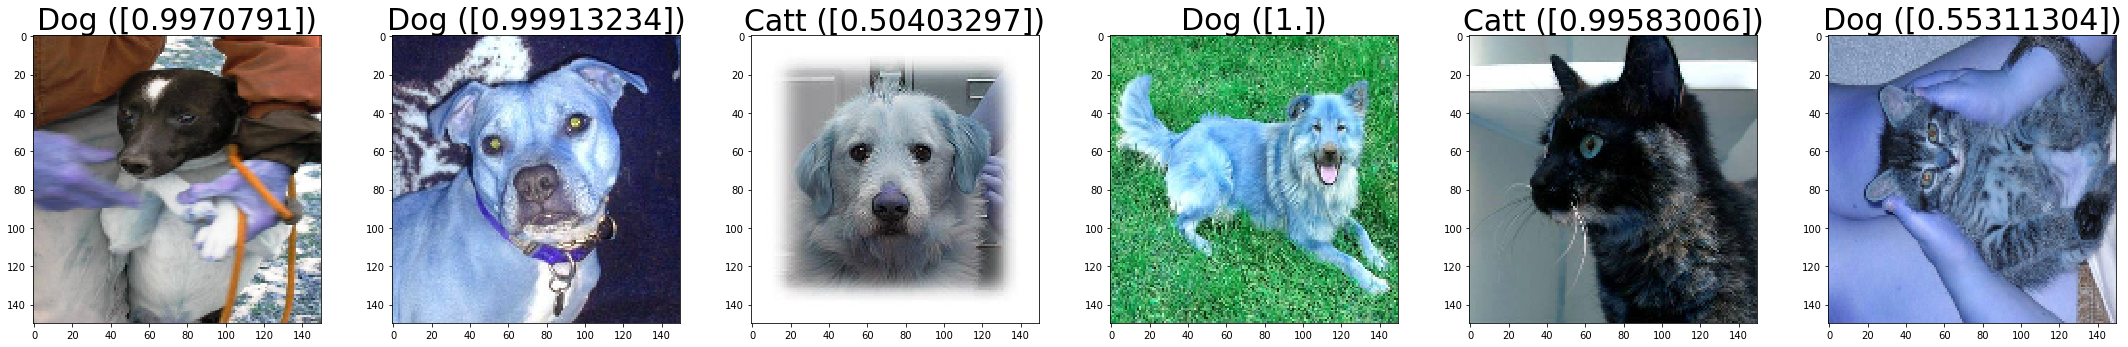

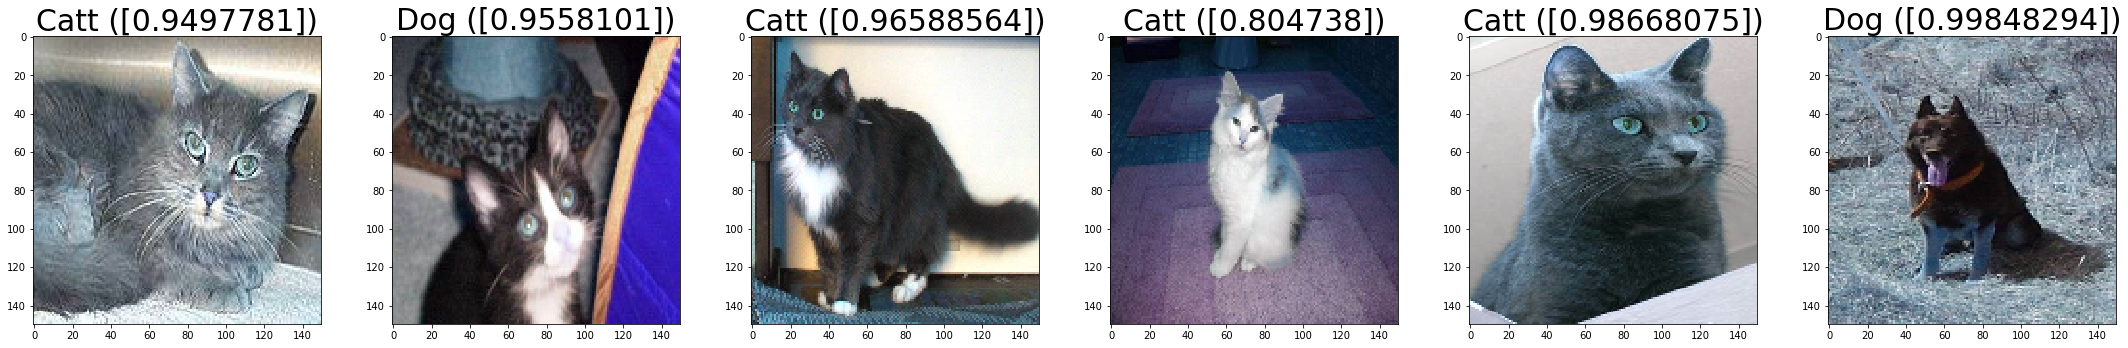

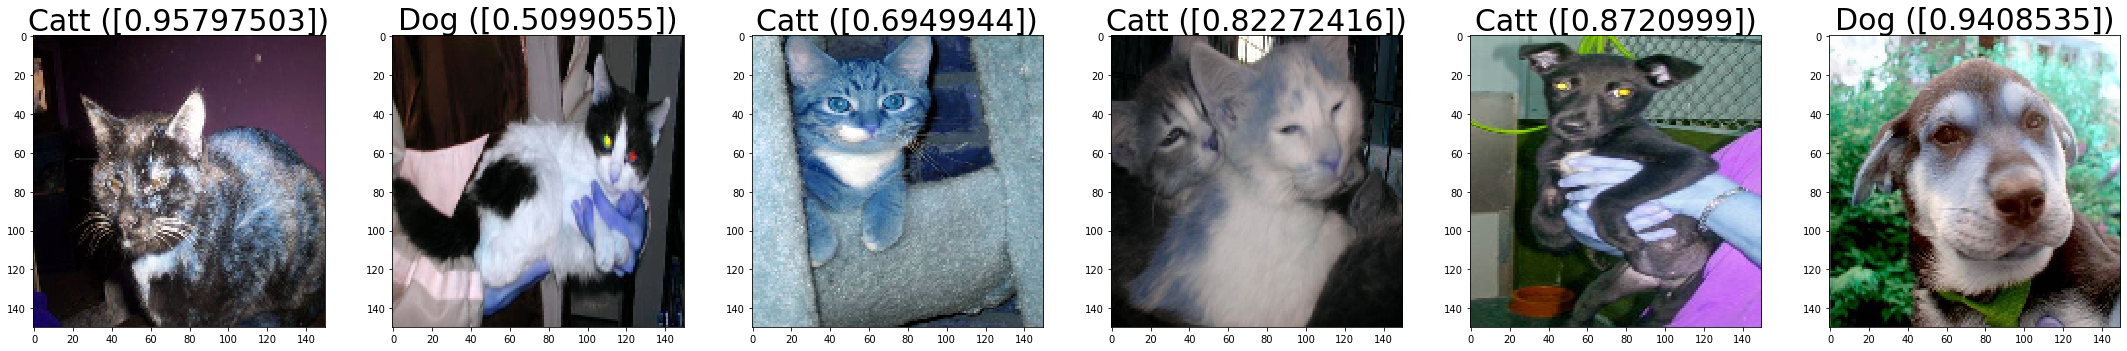

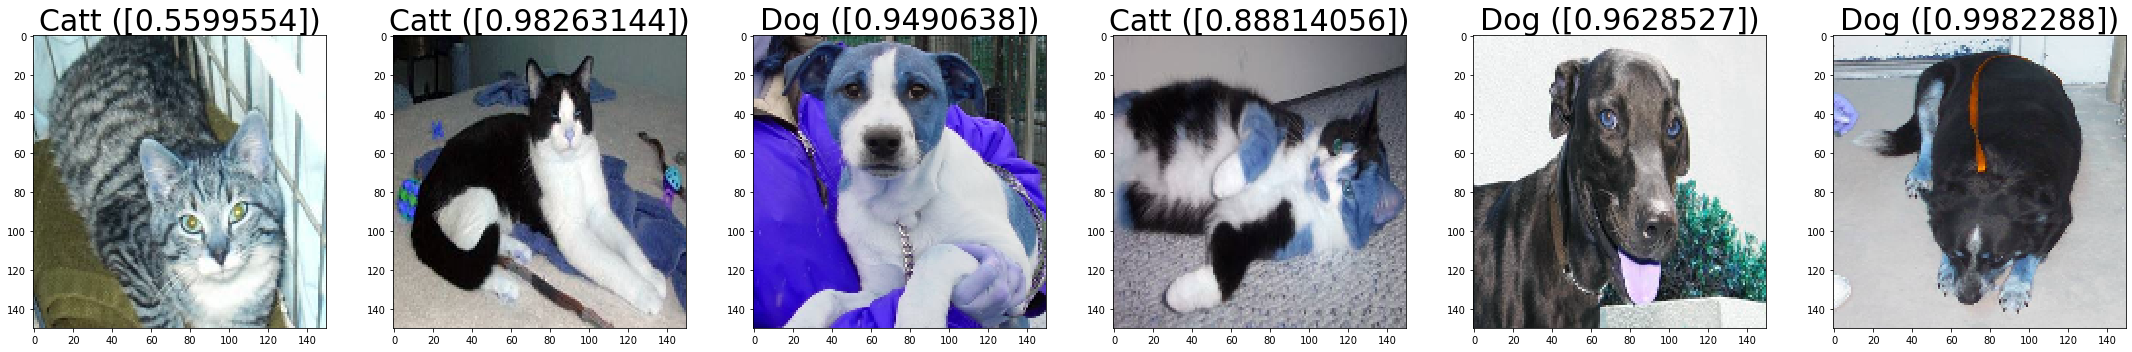

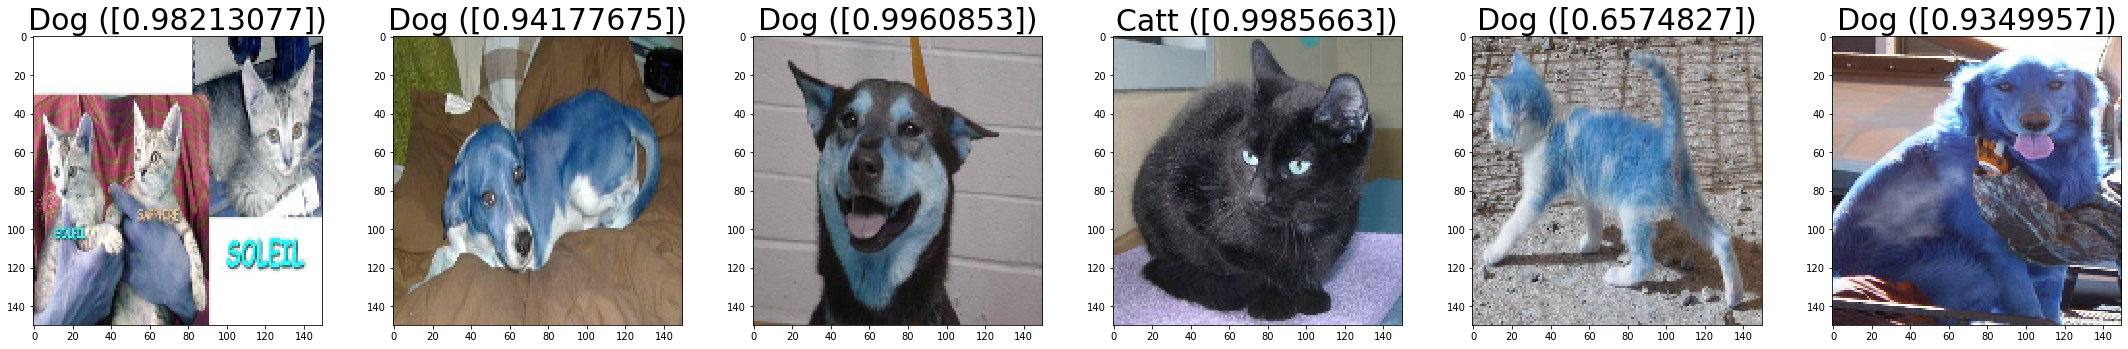

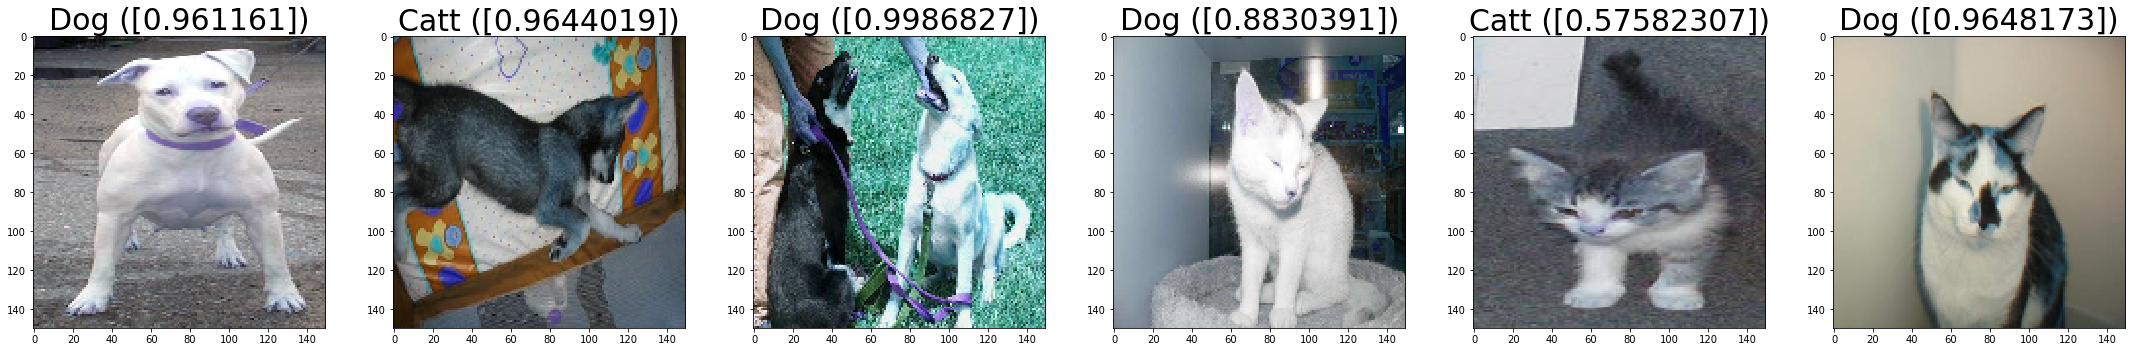

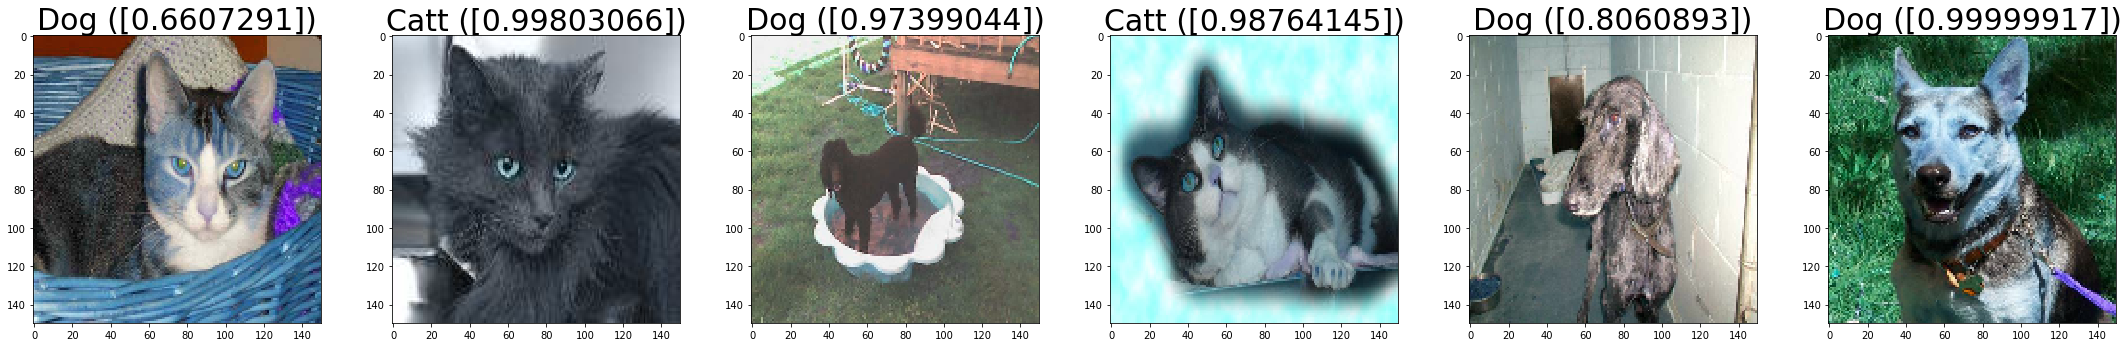

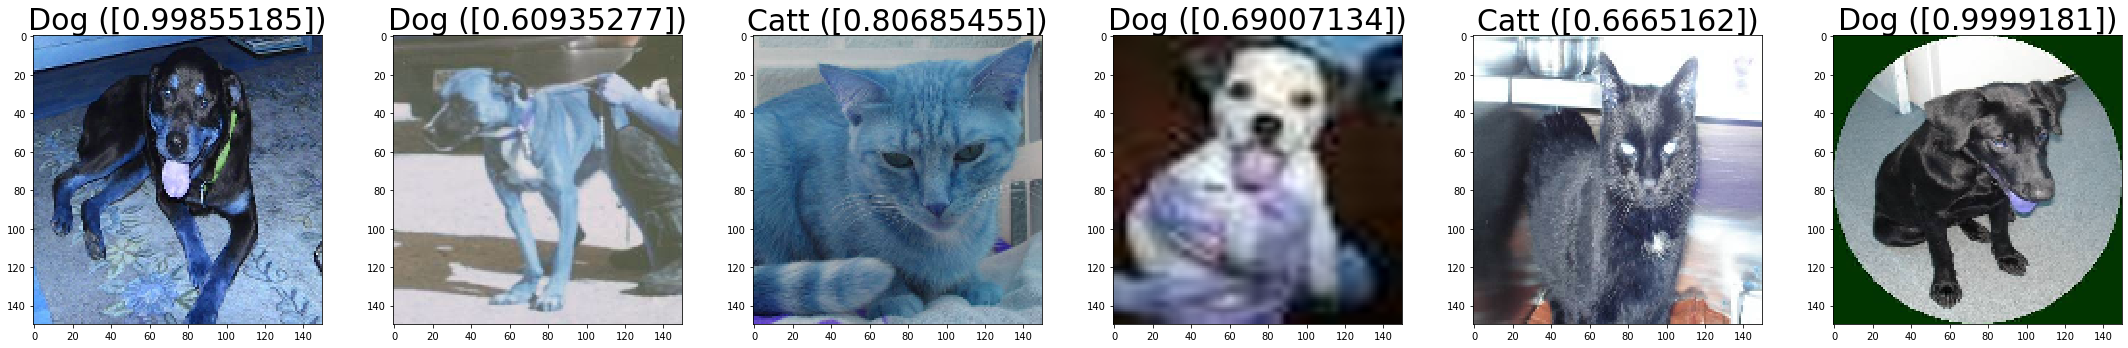

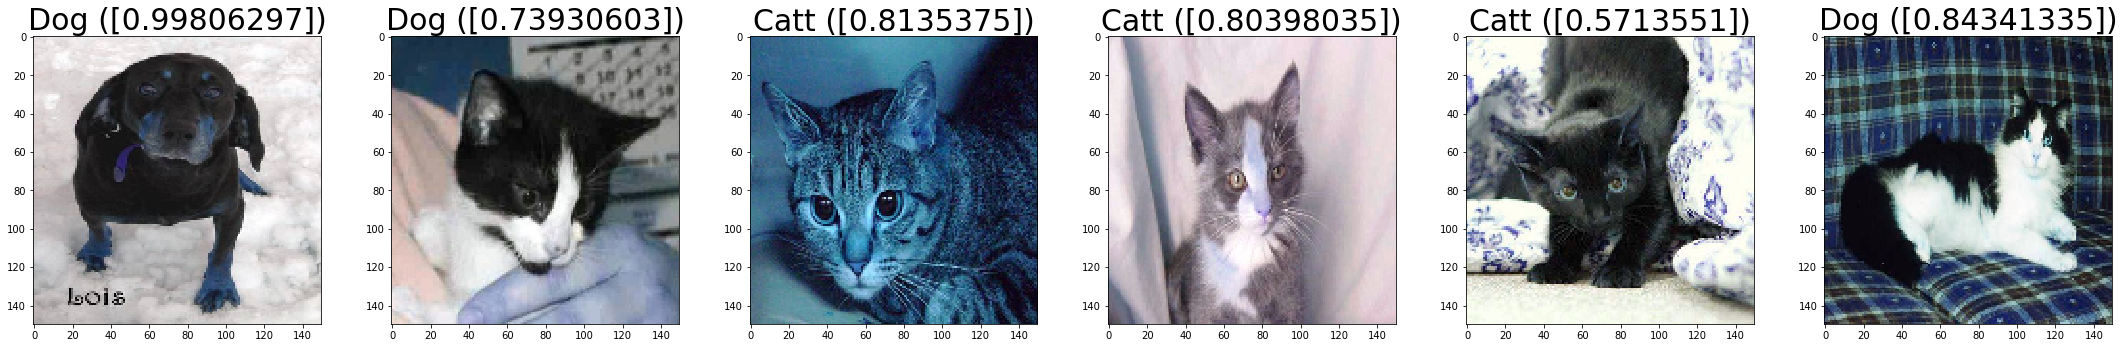

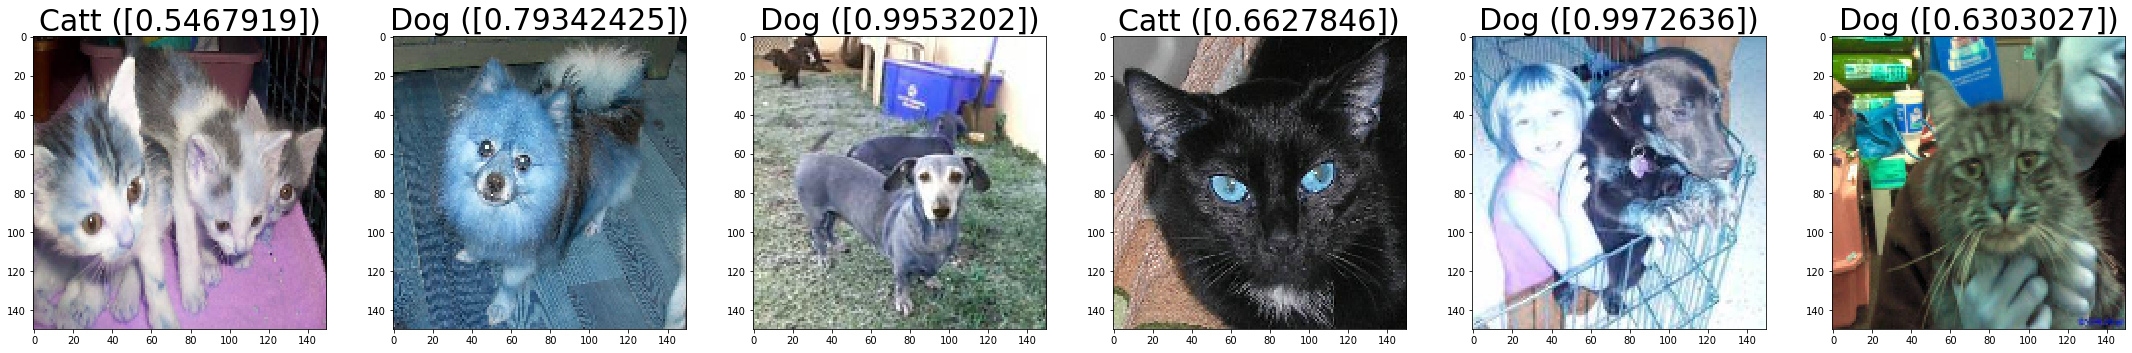

In [0]:
for i in range(0, 60, 6): 
    plot_data(X_test[i:], predictions[i:], 6)

In [0]:
#batch_size = 16
#test_generator = test_datagen.flow(np.array(X_test), batch_size=batch_size)

In [0]:
#prediction_probabilities = model.predict_generator(test_generator, verbose=1)

782/782 [==============================] - 61s 78ms/step


12500
0


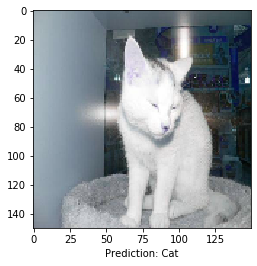

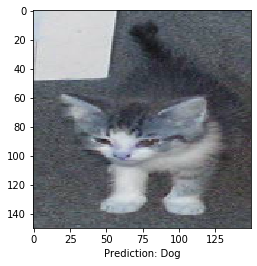

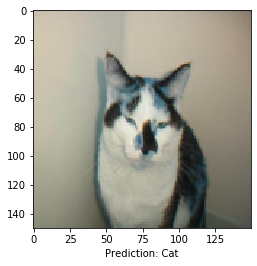

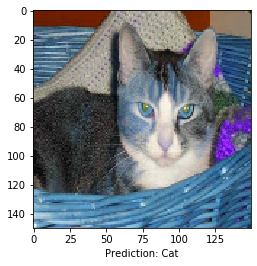

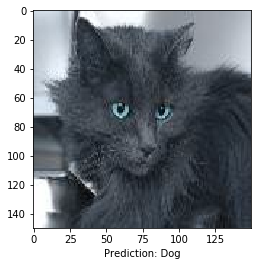

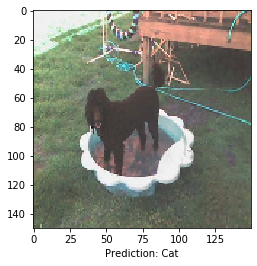

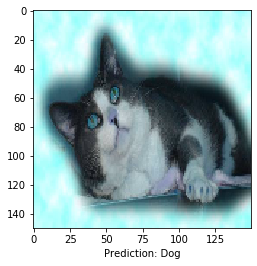

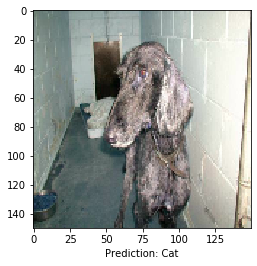

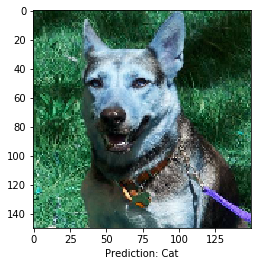

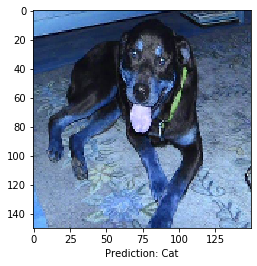

In [0]:
class_names = ['Cat', 'Dog']
test_images = np.array(X_test)
print(len(test_images))
test_labels = np.array(Y_test)
size = len(prediction_probabilities)
print(len(test_labels))
class_list = []
for i in range(size):
    if(prediction_probabilities[i]>0.5):
      class_list.append(0)
    else:
      class_list.append(1)

class_list = np.array(class_list)
checknum = 33# used as index for random img check, must be > 0
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i+checknum], cmap='gray')
    #plt.title("Actual: " + Y_test[i])
    plt.xlabel("Prediction: " + class_names[class_list[i+checknum]])
    plt.show()
